In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# import library
import numpy as np                     # numeric python library
import cv2
import matplotlib.pyplot as plt        # to plot any graph
import matplotlib.gridspec as gridspec
%matplotlib inline


from sklearn.feature_extraction import image

<function matplotlib.pyplot.show>

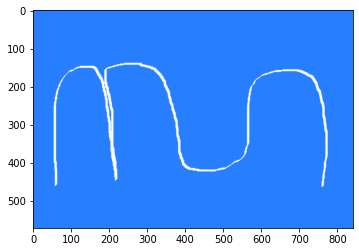

In [ ]:
# insert image
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/drive/MyDrive/FP_viskom/dataset_aksara/la/la.png')
plt.imshow(image)
plt.show

<function matplotlib.pyplot.show>

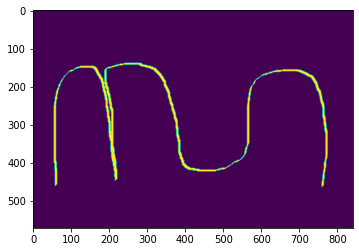

In [ ]:
#grayscale

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show

<function matplotlib.pyplot.show>

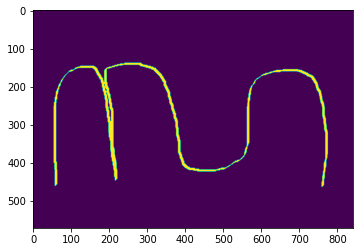

In [ ]:
# konversi menjadi citra biner
ret, bw_img = cv2.threshold(gray,200,255,cv2.THRESH_BINARY)

imgBiner = bw_img
plt.imshow(imgBiner)
plt.show

<function matplotlib.pyplot.show>

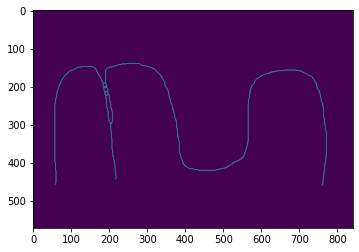

In [ ]:
# thinning
thinned = cv2.ximgproc.thinning(imgBiner)
  
plt.imshow(thinned)
plt.show

(30, 30)


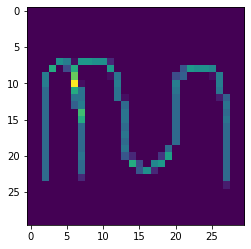

In [ ]:
# resize
resize = thinned
img = thinned
width = 30
height = 30
resized_resize = cv2.resize(resize, 
                          (width, height), 
                          interpolation = cv2.INTER_AREA,)
plt.imshow(resized_resize)
print(resized_resize.shape)

572
841
[0, 57, 114, 171, 228, 285, 342, 399, 456, 513, 570] 11
[0, 57, 114, 171, 228, 285, 342, 399, 456, 513, 570, 627, 684, 741, 798] 15


<function matplotlib.pyplot.show>

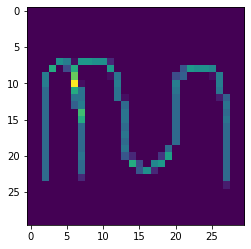

In [ ]:
imgGrid1 = resized_resize
grid = 57 #determine grid size, rectangle with the same size of size
height = np.size(img, 0) #finding the height of the picture
width = np.size(img, 1) #finding the width of the picture
 
print(height)
print(width)
 
#compute the coordinate of height and width in each grid
h= [x for x in range(0,height) if x%grid==0]
w= [x for x in range(0,width) if x%grid==0]
 
print(h,np.size(h,0))
print(w,np.size(w,0))
 
# cv2.rectangle(resized,(h[0],0),(h[1],50),(0,255,0),0)
for i in range(0,np.size(w,0)-1):
    for j in range(0,np.size(h,0)-1):
        #make rectangle (input image, [x1,y1],[x2,y2],RGB,thickness
        imgGrid = cv2.rectangle(imgGrid1,(w[i],h[j]),(w[i+1],h[j+1]),(0,255,0),2)

plt.imshow(imgGrid)
plt.show

0 0 10 10 1
1
10 0 10 10 2
2
20 0 10 10 3
3
0 10 10 10 4
4
10 10 10 10 5
5
20 10 10 10 6
6
0 20 10 10 7
7
10 20 10 10 8
8
20 20 10 10 9
9


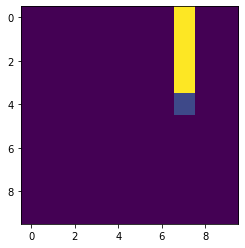

In [ ]:
import time
height, width = imgGrid.shape
# Berapa potongan di horisontal
CROP_W_SIZE  = 3
# Berapa potongan secara vertikal
CROP_H_SIZE = 3
count = 0
for ih in range(CROP_H_SIZE ):
    for iw in range(CROP_W_SIZE ):
        x = int(width/CROP_W_SIZE * iw)
        y = int(height/CROP_H_SIZE * ih)
        h = int((height / CROP_H_SIZE))
        w = int((width / CROP_W_SIZE ))
        count = count + 1
        print(x,y,h,w, count)
        cropped_img = imgGrid[y:y+h, x:x+w]
        plt.imshow(cropped_img)
        plt.show
        cv2.imwrite("crop/" + str(count) +  ".png",cropped_img)
        print(count)